In [2]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A4/cs3220_A4_src' #@param {type: "string"}
sys.path.append(path)

1. Generate a random maze with size (7,7), as a Numpy matrix, which includes 25% of occupied cells (walls).

In [3]:
import numpy as np 
import math
import random
size = (7,7)
mazeRand = np.random.choice([0,1], size=size, p=[0.25, 0.75]) #0 = wall
mazeRand

array([[1, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1]])

2. Build the maze state space

[[1 0 1 1 1 1 1]
 [1 1 0 0 1 1 1]
 [1 1 1 1 1 1 1]
 [1 0 1 1 1 0 0]
 [1 0 1 1 1 0 1]
 [1 0 0 1 0 1 1]
 [0 0 0 1 1 1 1]]


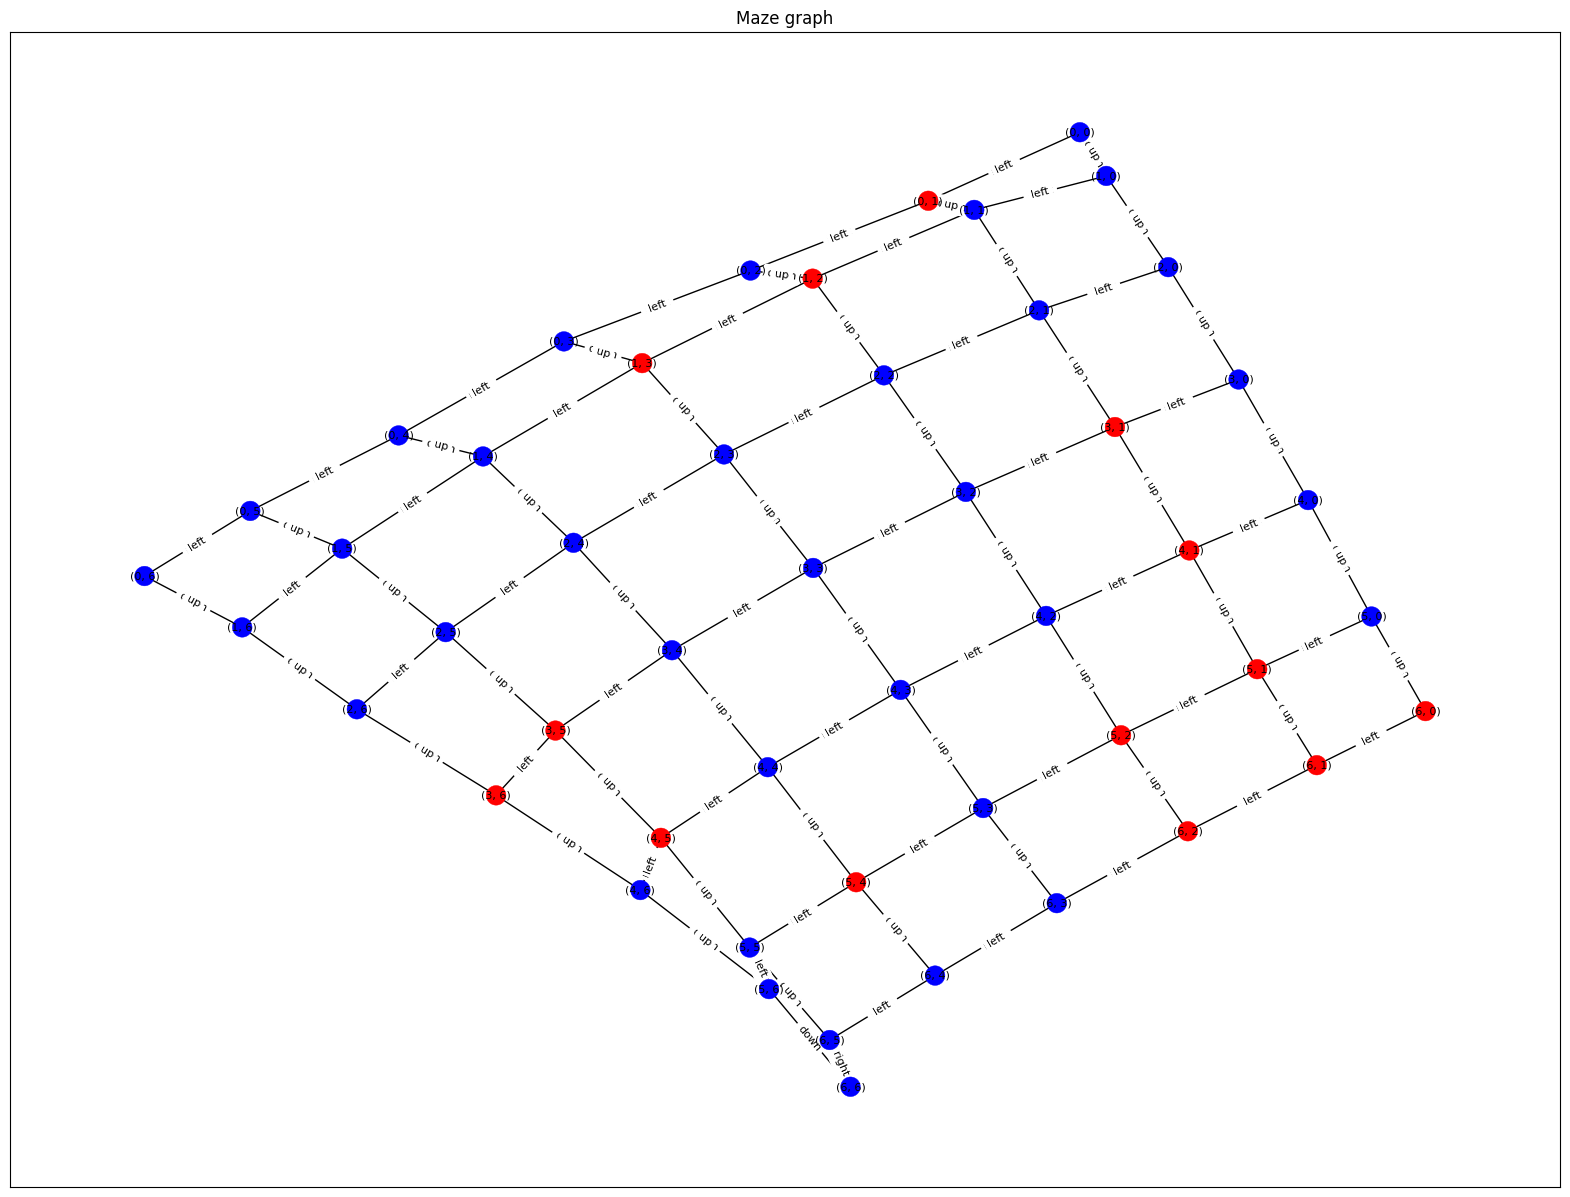

In [12]:
from mazeData import *
from mazeGraphClass import mazeGraph
from visualizations import simple_visualization

mazeActs=defineMazeActions(mazeRand)
maze=makeMazeTransformationModel(mazeActs)
res=mazeStatesLocations(7)
mazeWorldGraph=mazeGraph(maze, mazeStatesLocations(7))
simple_visualization(mazeWorldGraph, mazeRand)

[[1 0 1 1 1 1 1]
 [1 1 0 0 1 1 1]
 [1 1 1 1 1 1 1]
 [1 0 1 1 1 0 0]
 [1 0 1 1 1 0 1]
 [1 0 0 1 0 1 1]
 [0 0 0 1 1 1 1]]
35
[(0, 0), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 4), (1, 5), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 2), (3, 3), (3, 4), (4, 0), (4, 2), (4, 3), (4, 4), (4, 6), (5, 0), (5, 3), (5, 5), (5, 6), (6, 3), (6, 4), (6, 5), (6, 6)]
88 35


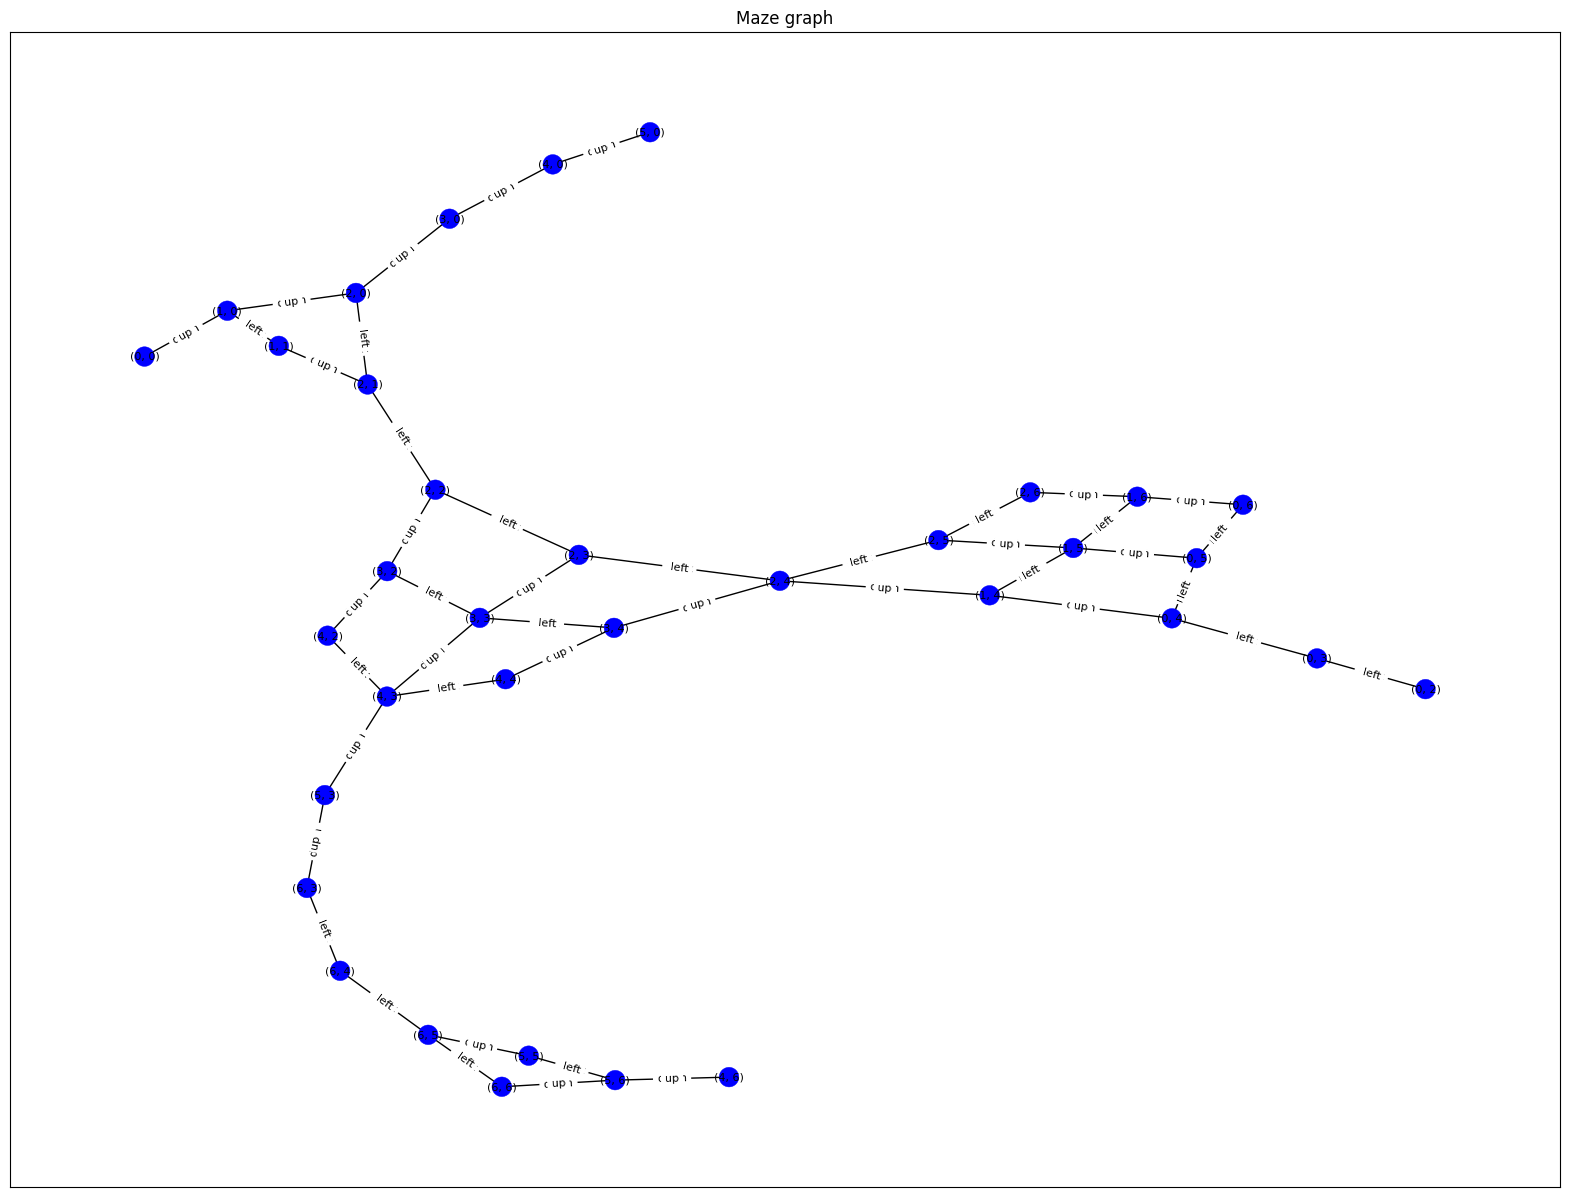

In [5]:
from visualizations import simple_visualization1
mazeAvailableActs=defineMazeAvailableActions(mazeRand)
maze1=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph1=mazeGraph(maze1, mazeStatesLocations(7))
simple_visualization1(mazeWorldGraph1, mazeRand)

3. Develop transition model where:
- The Rat-Agent is allowed to move only on free cells by using the following actions: *left, up, right, down*.
- Since the Maze is 7-story building different actions have different costs: left/right: -2 (from Agent's performance); down:-1; up:-4.

In [ ]:
def makeMazeTransformationModel2(mazeActs):
    mazeStateSpace={}
    for key in mazeActs:
      for action in mazeActs[key]:
        if action=='left':
          x=key[0]
          y=key[1]-1
          cost = 2
          mazeStateSpace.setdefault(key,{})[action]=((x,y), cost)
        elif action=='up':
          x=key[0]-1
          y=key[1]
          cost = 4
          mazeStateSpace.setdefault(key,{})[action]=((x,y), cost)
        elif action=='right':
          x=key[0]
          y=key[1]+1
          cost = 2
          mazeStateSpace.setdefault(key,{})[action]=((x,y), cost)
        elif action=='down':
          x=key[0]+1
          y=key[1]
          cost = 1
          mazeStateSpace.setdefault(key,{})[action]=((x,y), cost)
      if len(mazeActs[key])==0:
        mazeStateSpace.setdefault(key,{})

    return mazeStateSpace
  
maze2 = makeMazeTransformationModel2(mazeAvailableActs)
maze2

{(0, 0): {'down': [(1, 0), 1]},
 (0, 1): {},
 (0, 2): {'right': [(0, 3), 2]},
 (0, 3): {'left': [(0, 2), 2], 'right': [(0, 4), 2]},
 (0, 4): {'left': [(0, 3), 2], 'right': [(0, 5), 2], 'down': [(1, 4), 1]},
 (0, 5): {'left': [(0, 4), 2], 'right': [(0, 6), 2], 'down': [(1, 5), 1]},
 (0, 6): {'left': [(0, 5), 2], 'down': [(1, 6), 1]},
 (1, 0): {'up': [(0, 0), 4], 'right': [(1, 1), 2], 'down': [(2, 0), 1]},
 (1, 1): {'left': [(1, 0), 2], 'down': [(2, 1), 1]},
 (1, 2): {},
 (1, 3): {},
 (1, 4): {'up': [(0, 4), 4], 'right': [(1, 5), 2], 'down': [(2, 4), 1]},
 (1, 5): {'left': [(1, 4), 2],
  'up': [(0, 5), 4],
  'right': [(1, 6), 2],
  'down': [(2, 5), 1]},
 (1, 6): {'left': [(1, 5), 2], 'up': [(0, 6), 4], 'down': [(2, 6), 1]},
 (2, 0): {'up': [(1, 0), 4], 'right': [(2, 1), 2], 'down': [(3, 0), 1]},
 (2, 1): {'left': [(2, 0), 2], 'up': [(1, 1), 4], 'right': [(2, 2), 2]},
 (2, 2): {'left': [(2, 1), 2], 'right': [(2, 3), 2], 'down': [(3, 2), 1]},
 (2, 3): {'left': [(2, 2), 2], 'right': [(2, 4)

In [20]:
from graphClass import Graph

class mazeGraph2(Graph):
    def __init__(self, graph_dict=None,locations=None):
        self.g=dict()
        super().__init__(graph_dict)
        self.make_graph()
        self.locations=locations


    def make_graph(self):
        for a in self.graph_dict.keys():
        #print(self.graph_dict[a].items())
            for (act, b) in self.graph_dict[a].items():
                self.connect(a, b, 1)

    def connect(self, A, B, distance):
        #print(self.g)
        self.g.setdefault(A, {})[B] = distance

    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([v2 for v in self.graph_dict.values() for k2, v2 in v[0].items()])
        s3 = set([c2 for c in self.graph_dict.values()[1]])
        temp = s1.union(s2)
        nodes = temp.union(s3)
        return list(nodes)

    def get(self, a, b=None):
            """Return a link distance or a dict of {node: distance} entries.
            .get(a,b) returns the distance or None;
            .get(a) returns a dict of {node: distance} entries, possibly {}."""
            links = self.g.setdefault(a, {})
            if b is None:
                return links
            else:
                return links.get(b)

    def getLocation(self,a):
        return self.locations.get(a)  


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

def simple_visualization2(data,mazeStructure):
    print(mazeStructure)
    G = nx.Graph(data.g)
    plt.figure(figsize=(20, 15))
    plt.title('Maze graph')
    nodes_colors=[]
    for node in data.graph_dict.keys():
        #print (node)
        #print (mazeStructure[node[0],node[1]])
        if mazeStructure[node[0],node[1]]==0:
            nodes_colors.append('red')
        else:
            nodes_colors.append('blue')
    edge_weights = {(k, v2) : k2 for k, v in data.graph_dict.items() for k2, v2 in v.items()}#actions
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,linewidths=0.3, node_color= nodes_colors, node_size=200)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos,font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weights,font_size=8)

In [24]:
mazeWorldGraph2 = mazeGraph2(maze2,mazeStatesLocations(7))
edge_weights = {(k, v2) : k2 for k, v in mazeWorldGraph2.graph_dict.items() for k2, v2 in v.items()}

TypeError: unhashable type: 'list'

4. Implement 2 Rat-Agents (based on Uniform-cost  and BreadthFirst Search algoritms) and apply them (separately) to find out which one is more productive for getting cheese (which Agent spends less peformance to get cheese).
* for Uniform-cost Search apply BEST-FIRST-SEARCH
with PATH-COST as the evaluation function
* PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.

In [ ]:
mazeTest = [[1, 0, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1],
            [1, 0, 1, 1, 1, 0, 0],
            [1, 0, 1, 1, 1, 0, 1],
            [1, 0, 0, 1, 0, 1, 1],
            [0, 0, 0, 1, 1, 1, 1]]

initState = (0,0)
goalState = (6,6)


from mazeProblemSolvingAgentClass import MazeProblemSolvingAgent
ma1=MazeProblemSolvingAgent(initState,mazeWorldGraph1,goalState)
mp1=MazeProblem(initState,goalState,mazeWorldGraph1)
